In [15]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
from sklearn.cluster import KMeans
import cv2
import numpy as np
import skdemo

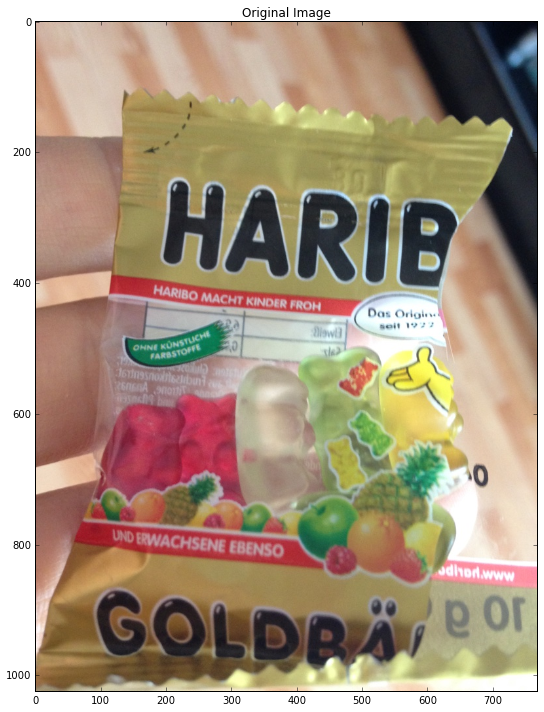

In [22]:
image = cv2.imread("./data/thumb_IMG_4096_1024.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.subplot(), plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

In [23]:
print image.shape

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))
print image.shape

(1024, 768, 3)
(786432, 3)


In [24]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 3)
clt.fit(image)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [11]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

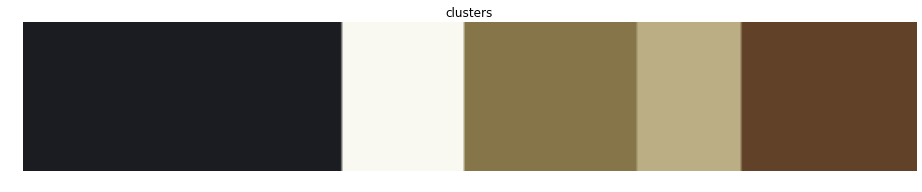

In [27]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure(figsize=(16,12))
plt.axis("off")
plt.title('clusters')
plt.imshow(bar)

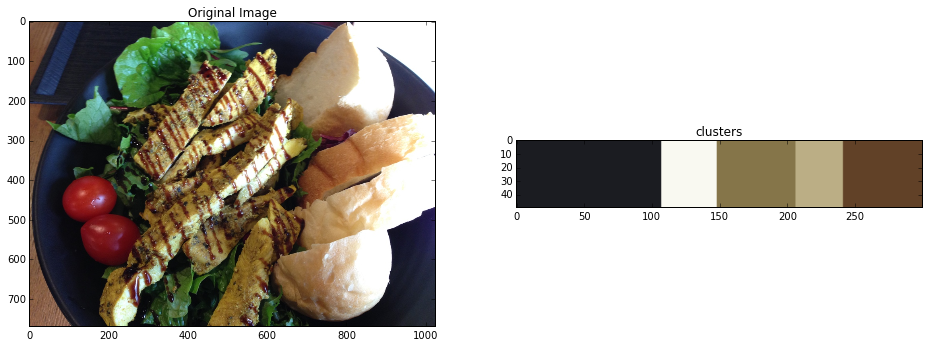

In [26]:
image = cv2.imread("./data/IMG_3612_1024.jpg")
ori = image.copy()
ori = cv2.cvtColor(ori, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(ori, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(bar, cmap = 'gray')
plt.title('clusters')

In [28]:
clt

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [47]:
print "lables : %s" %str(clt.labels_)
print "unique lables : %s" %str(np.unique(clt.labels_))
print "unique lables range: %s" %str(np.arange(0, len(np.unique(clt.labels_)) + 1))
numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
print "lable별로 갯수샌거 : %s" %str(np.histogram(clt.labels_, bins = numLabels))
hist, _ = np.histogram(clt.labels_, bins = numLabels)
print "레이블 형 변환 : %s" %str(hist.astype("float"))
hist = hist.astype("float")
hist /= hist.sum()
print "정규화 : %s" %hist

lables : [2 2 2 ..., 0 0 0]
unique lables : [0 1 2 3 4]
unique lables range: [0 1 2 3 4 5]
lable별로 갯수샌거 : (array([281392, 108283, 151760,  91680, 153317]), array([0, 1, 2, 3, 4, 5]))
레이블 형 변환 : [ 281392.  108283.  151760.   91680.  153317.]
정규화 : [ 0.35780843  0.13768895  0.19297282  0.11657715  0.19495265]


In [52]:
bar = np.zeros((50, 300, 3), dtype = "uint8")
startX = 0
centroids = clt.cluster_centers_
print "센터들 %s" %str(centroids)

for (percent, color) in zip(hist, centroids):
    endX = startX + (percent * 300)
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
    #                     왼쪽아래              오른쪽위
    print startX
    print endX
    print 
    startX = endX
    
print color.astype("uint8").tolist()

센터들 [[  27.26468414   28.6590166    33.14979459]
 [ 249.77269747  249.35001801  241.64903078]
 [ 133.54166447  117.6886136    73.54997364]
 [ 187.96559773  174.29223386  133.84668412]
 [  97.46391463   65.74116373   39.70812108]]
0
107.342529297

107.342529297
148.649215698

148.649215698
206.541061401

206.541061401
241.514205933

241.514205933
300.0

[97, 65, 39]
